# markup data by simle VADER

VADER works by analyzing the polarity of words and assigning a sentiment score to each word based on its emotional value. These individual word scores are then combined to calculate an overall sentiment score for the entire text.

It uses compound score which is a normalized value between -1 and +1 representing the overall sentiment:
- Compound score > 0.05: Positive sentiment
- Compound score < -0.05: Negative sentiment
- Compound score between -0.05 and 0.05: Neutral sentiment

In [ ]:
# !pip install vaderSentiment

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import pandas as pd

upload test and traint datasets and merge neg and positive rows

In [5]:
train_pos_data = pd.read_csv('../data/amdb_dataset/train/train_pos_data.csv')
train_neg_data = pd.read_csv('../data/amdb_dataset/train/train_neg_data.csv')
test_pos_data = pd.read_csv('../data/amdb_dataset/test/test_pos_data.csv')
test_neg_data = pd.read_csv('../data/amdb_dataset/test/test_neg_data.csv')

create predict func

In [8]:
analyzer = SentimentIntensityAnalyzer()

def predict_by_varde_and_save(input_data: pd.DataFrame, file_path: str):
    output_data = input_data.copy()
    output_data["prediction"] = None

    for text in tqdm(output_data['text'].tolist()):
        predictions: dict = analyzer.polarity_scores(text)
        if predictions['compound'] >= 0.05:
            output_data.loc[output_data['text'] == text, 'prediction'] = 1
        elif predictions['compound'] <= -0.05:
            output_data.loc[output_data['text'] == text, 'prediction'] = 0
        elif predictions['pos'] >= predictions['neg']:
            output_data.loc[output_data['text'] == text, 'prediction'] = 1
        else:
            output_data.loc[output_data['text'] == text, 'prediction'] = 0

    output_data.to_csv(file_path)

    return output_data

In [9]:
vader_train_pos_data = predict_by_varde_and_save(train_pos_data, "../data/amdb_dataset/train/train_pos_data_vader.csv")
vader_train_neg_data = predict_by_varde_and_save(train_neg_data, "../data/amdb_dataset/train/train_neg_data_vader.csv")
predict_by_varde_and_save(test_pos_data, "../data/amdb_dataset/test/test_pos_data_vader.csv")
predict_by_varde_and_save(test_neg_data, "../data/amdb_dataset/test/test_neg_data_vader.csv")

100%|██████████| 12500/12500 [00:59<00:00, 209.53it/s]


,text,mark,prediction
0,Once again Mr. Costner has dragged out a movie...,2,1
1,This is an example of why the majority of acti...,4,1
2,"First of all I hate those moronic rappers, who...",1,0
3,Not even the Beatles could write songs everyon...,3,1
4,Brass pictures (movies is not a fitting word f...,3,1
...,...,...,...
12495,I occasionally let my kids watch this garbage ...,1,0
12496,When all we have anymore is pretty much realit...,1,1
12497,The basic genre is a thriller intercut with an...,3,1
12498,Four things intrigued me as to this film - fir...,3,1


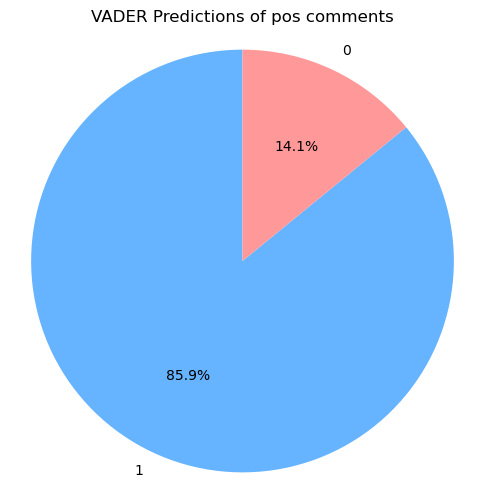

In [17]:
import matplotlib.pyplot as plt

counts = vader_train_pos_data['prediction'].value_counts()  
labels = counts.index
sizes = counts.values

colors = ['#66b3ff', '#ff9999']  

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('VADER Predictions of pos comments')
plt.axis('equal') 
plt.show()

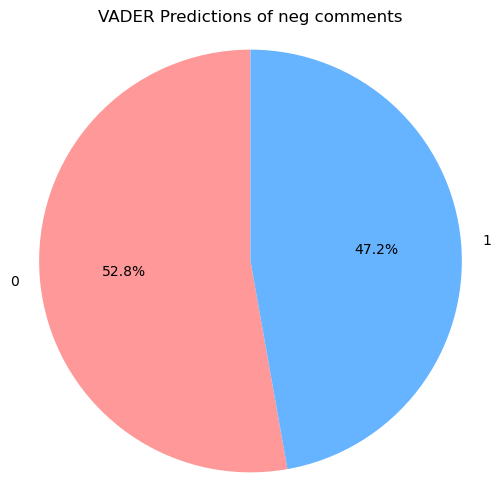

In [18]:
import matplotlib.pyplot as plt

counts = vader_train_neg_data['prediction'].value_counts()  
labels = counts.index
sizes = counts.values

colors = ['#ff9999', '#66b3ff']  

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('VADER Predictions of neg comments')
plt.axis('equal') 
plt.show()

# so very bad